### Jaeger vs Kaiju Timing ###

##### Uniform distribution with 3 hotrod#####
*  5000 _requests_
* _seed_ = "EXP"
* _m_=2 _var_=2
* _Time Interval_ = 100 seconds

In [70]:
import matplotlib.pyplot as pyplot
import numpy as np

n_tests = 3
path = "api_csv/bigLoad+_1sec_180s_limit100/"

#LEGEND

#Kaiju
color = ["navy","blue","royalblue"] 

#Jaeger
j_color = ["firebrick","red","salmon"]

In [37]:
timings = []
for i in range(n_tests):
    timings.append(np.genfromtxt(path +'kaijuTiming_' + str(i + 1) + '.csv', delimiter=', ', dtype='str'))
    
traceId = []
spanId = []
startTime = []
duration = []
eventTime = []
t_end_span =[]
t_diff = []

for timing in timings:
    traceId.append(np.array(timing[0:,0]))
    spanId.append(np.array(timing[0:,1]))
    startTime.append(np.array(timing[0:,2]).astype(np.int64))
    duration.append(np.array(timing[0:,3]).astype(np.int64))
    eventTime.append(np.array(timing[0:,4]).astype(np.int64))
    t_end_span.append(np.add(startTime[-1], duration[-1]))
    t_diff.append(np.subtract(eventTime[-1], t_end_span[-1]))

j_timings = []
for i in range(n_tests):
    j_timings.append(np.genfromtxt(path +'jaegerTiming_' + str(i + 1) + '.csv', delimiter=', ', dtype='str'))
    
j_traceId = []
j_spanId = []
j_startTime = []
j_duration = []
j_eventTime = []
j_t_end_span =[]
j_t_diff = []

for j_timing in j_timings:
    j_traceId.append(np.array(j_timing[0:,0]))
    j_spanId.append(np.array(j_timing[0:,1]))
    j_startTime.append(np.array(j_timing[0:,2]).astype(np.int64))
    j_duration.append(np.array(j_timing[0:,3]).astype(np.int64))
    j_eventTime.append(np.array(j_timing[0:,4]).astype(np.int64))
    j_t_end_span.append(np.add(j_startTime[-1], j_duration[-1]))
    j_t_diff.append(np.subtract(j_eventTime[-1], j_t_end_span[-1]))

In [38]:
lconcat_traces_span = []
lj_concat_traces_span = []

for i in range(n_tests):
    print("TEST NUMBER " + str(i + 1))
    print("Kaiju Traces: " + str(np.unique(traceId[i]).shape[0]))
    print("Jaeger Traces: " + str(np.unique(j_traceId[i]).shape[0]))
    # print("Traces in Kaiju and not in Jaeger " + str((np.setdiff1d(traceId[i], j_traceId[i]).tolist())))
    # print("Traces in Jaeger and not in Kaiju " + str((np.setdiff1d(j_traceId[i], traceId[i]).tolist())))
    print("")
    lconcat_traces_span.append(np.core.defchararray.add(np.core.defchararray.add(traceId[i], " "), spanId[i]))
    lj_concat_traces_span.append(np.core.defchararray.add(np.core.defchararray.add(j_traceId[i], " "), j_spanId[i]))
    print("Kaiju Spans: " + str(np.unique(lconcat_traces_span[-1]).shape[0]))
    print("Jaeger Spans: " + str(np.unique(lj_concat_traces_span[-1]).shape[0]))
    # print("Spans (traceId spanId) in Kaiju and not in Jaeger " + str(len(np.setdiff1d(concat_traces_span, j_concat_traces_span).tolist())))
    # print("Spans (traceId spanId) in Jaeger and not in Kaiju " + str(len(np.setdiff1d(j_concat_traces_span, concat_traces_span).tolist())))
    print("*******************************************************************\n")

TEST NUMBER 1
Kaiju Traces: 4904
Jaeger Traces: 3769

Kaiju Spans: 211529
Jaeger Spans: 154003
*******************************************************************

TEST NUMBER 2
Kaiju Traces: 4929
Jaeger Traces: 3411

Kaiju Spans: 214136
Jaeger Spans: 141721
*******************************************************************

TEST NUMBER 3
Kaiju Traces: 4868
Jaeger Traces: 3755

Kaiju Spans: 212911
Jaeger Spans: 160160
*******************************************************************



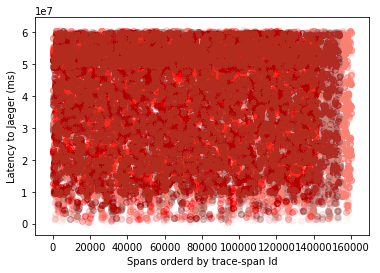

In [39]:
for i in range(n_tests):
    traceIdspanIdinds = lj_concat_traces_span[i].argsort()
    sortedByTraceSpan_t_diff = j_t_diff[i][traceIdspanIdinds]
    pyplot.scatter(np.arange(traceIdspanIdinds.shape[0]), sortedByTraceSpan_t_diff, alpha=0.01, color=j_color[i])
pyplot.xlabel('Spans orderd by trace-span Id')
pyplot.ylabel('Latency to Jaeger (ms)')
pyplot.show()

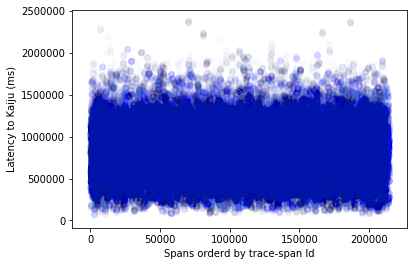

In [40]:
for i in range(n_tests):
    traceIdspanIdinds = lconcat_traces_span[i].argsort()
    sortedByTraceSpan_t_diff = t_diff[i][traceIdspanIdinds]
    pyplot.scatter(np.arange(traceIdspanIdinds.shape[0]), sortedByTraceSpan_t_diff, alpha=0.01, color=color[i])
pyplot.xlabel('Spans orderd by trace-span Id')
pyplot.ylabel('Latency to Kaiju (ms)')
pyplot.show()

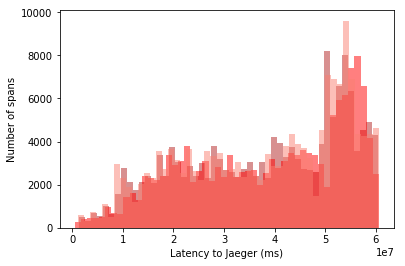

In [41]:
for i in range(n_tests):
    a = 0.5
    l = "Jaeger " + str(i)
    pyplot.hist(j_t_diff[i], 50, alpha=a, color=j_color[i], label=l)
pyplot.xlabel('Latency to Jaeger (ms)')
pyplot.ylabel('Number of spans')
pyplot.show()

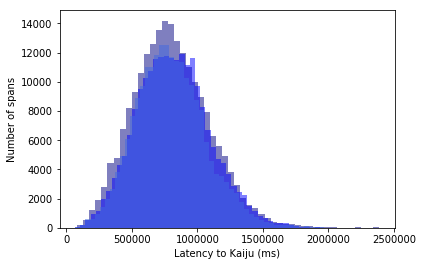

In [42]:
for i in range(n_tests):
    a = 0.5
    l = "Kaiju " + str(i)
    pyplot.hist(t_diff[i], 50, alpha=a, color=color[i], label = l)
pyplot.xlabel('Latency to Kaiju (ms)')
pyplot.ylabel('Number of spans')
pyplot.show()

TEST NUMBER 1
Min latency: Kaiju 1277745ms Jaeger 83796ms
Max latency: Kaiju 60525515ms Jaeger 2388429ms
*******************************************************************

TEST NUMBER 2
Min latency: Kaiju 490931ms Jaeger 66477ms
Max latency: Kaiju 60591512ms Jaeger 2056733ms
*******************************************************************

TEST NUMBER 3
Min latency: Kaiju 1116295ms Jaeger 65730ms
Max latency: Kaiju 60667496ms Jaeger 1963579ms
*******************************************************************



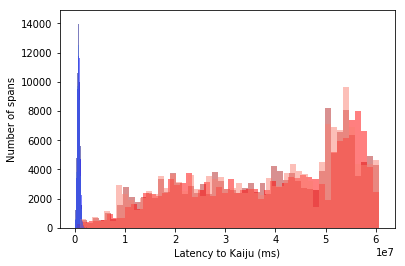

In [43]:
for i in range(n_tests):
    max_lat = np.amax(j_t_diff[i])
    j_max_lat = np.amax(t_diff[i])
    min_lat = np.amin(j_t_diff[i])
    j_min_lat = np.amin(t_diff[i])
    bins = np.linspace(min(min_lat, j_min_lat), max(max_lat, j_max_lat), 10)
    print("TEST NUMBER " + str(i + 1))
    print("Min latency: Kaiju " + str(min_lat) + "ms Jaeger " + str(j_min_lat) + "ms")
    print("Max latency: Kaiju " + str(max_lat) + "ms Jaeger " + str(j_max_lat) + "ms")  
    print("*******************************************************************\n")

    pyplot.hist(j_t_diff[i], 50, alpha=0.5, color=j_color[i])
    pyplot.hist(t_diff[i], 50, alpha=0.5, color=color[i])

pyplot.xlabel('Latency to Kaiju (ms)')
pyplot.ylabel('Number of spans')
# pyplot.legend(loc='upper right')
pyplot.show()

In [44]:
ltrace_firstSpan = []
ltrace_lastSpan = []
lnumSpansPerTrace = []
lj_trace_firstSpan = []
lj_trace_lastSpan = []
lj_numSpansPerTrace = []

for j in range(n_tests):
    traceIdinds = traceId[j].argsort()
    sortedByTrace_traceId = traceId[j][traceIdinds[::-1]]
    sortedByTrace_eventTime = eventTime[j][traceIdinds[::-1]]

    traces = np.unique(sortedByTrace_traceId).tolist()
    trace_firstSpan = np.zeros(len(traces), dtype='int64')
    trace_lastSpan = np.zeros(len(traces), dtype='int64')
    numSpansPerTrace = np.zeros(len(traces), dtype='int64')

    t = 0
    for trace in traces:
        i, = np.where(sortedByTrace_traceId == trace)
        sortedByTrace_eventTime_i = sortedByTrace_eventTime[i]
        sorted_sortedByTrace_eventTime_i = np.sort(sortedByTrace_eventTime_i)
        trace_firstSpan[t] = sorted_sortedByTrace_eventTime_i[0]
        trace_lastSpan[t] = sorted_sortedByTrace_eventTime_i[-1]
        numSpansPerTrace[t] = len(sortedByTrace_eventTime_i)
        t +=1
        
    ltrace_firstSpan.append(trace_firstSpan)
    ltrace_lastSpan.append(trace_lastSpan)
    lnumSpansPerTrace.append(numSpansPerTrace)
    
    # JAEGER
    
    j_traceIdinds = j_traceId[j].argsort()
    j_sortedByTrace_traceId = j_traceId[j][j_traceIdinds[::-1]]
    j_sortedByTrace_eventTime = j_eventTime[j][j_traceIdinds[::-1]]

    j_traces = np.unique(j_sortedByTrace_traceId).tolist()
    j_trace_firstSpan = np.zeros(len(j_traces), dtype='int64')
    j_trace_lastSpan = np.zeros(len(j_traces), dtype='int64')
    j_numSpansPerTrace = np.zeros(len(j_traces), dtype='int64')

    j_t = 0
    for trace in j_traces:
        i, = np.where(j_sortedByTrace_traceId == trace)
        j_sortedByTrace_eventTime_i = j_sortedByTrace_eventTime[i]
        j_sorted_sortedByTrace_eventTime_i = np.sort(j_sortedByTrace_eventTime_i)
        j_trace_firstSpan[j_t] = j_sorted_sortedByTrace_eventTime_i[0]
        j_trace_lastSpan[j_t] = j_sorted_sortedByTrace_eventTime_i[-1]
        j_numSpansPerTrace[j_t] = len(j_sortedByTrace_eventTime_i)
        j_t +=1
        
    lj_trace_firstSpan.append(j_trace_firstSpan)
    lj_trace_lastSpan.append(j_trace_lastSpan)
    lj_numSpansPerTrace.append(j_numSpansPerTrace)

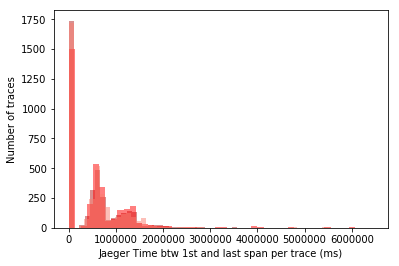

In [45]:
j_t_diff_per_trace = []

for i in range(n_tests):
    j_t_diff_per_trace.append(np.subtract(lj_trace_lastSpan[i], lj_trace_firstSpan[i]))
    a = 0.5
    l = "Jaeger " + str(i)
    pyplot.hist(j_t_diff_per_trace[-1], 50, alpha=a, color=j_color[i], label=l)
pyplot.xlabel('Jaeger Time btw 1st and last span per trace (ms)')
pyplot.ylabel('Number of traces')
pyplot.show()

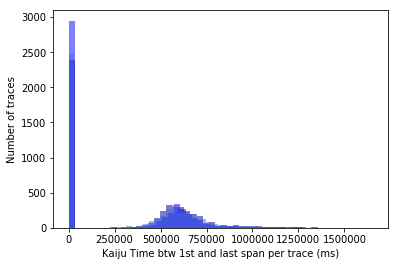

In [46]:
t_diff_per_trace = []

for i in range(n_tests):
    t_diff_per_trace.append(np.subtract(ltrace_lastSpan[i], ltrace_firstSpan[i]))
    a = 0.5
    l = "Kaiju " + str(i)
    pyplot.hist(t_diff_per_trace[-1], 50, alpha=a, color=color[i], label=l)
pyplot.xlabel('Kaiju Time btw 1st and last span per trace (ms)')
pyplot.ylabel('Number of traces')
pyplot.show()

TEST NUMBER 1
Max diff 1st-last: Kaiju 1655854ms Jaeger 5569838ms
Min diff 1st-last: Kaiju 0ms Jaeger 0ms
*******************************************************************

TEST NUMBER 2
Max diff 1st-last: Kaiju 1591436ms Jaeger 6453233ms
Min diff 1st-last: Kaiju 0ms Jaeger 0ms
*******************************************************************

TEST NUMBER 3
Max diff 1st-last: Kaiju 1559902ms Jaeger 5487204ms
Min diff 1st-last: Kaiju 0ms Jaeger 0ms
*******************************************************************



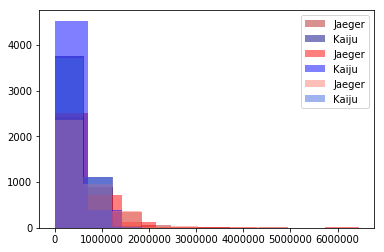

In [47]:
for i in range(n_tests):
    max_lat = np.amax(t_diff_per_trace[i])
    j_max_lat = np.amax(j_t_diff_per_trace[i])
    min_lat = np.amin(t_diff_per_trace[i])
    j_min_lat = np.amin(j_t_diff_per_trace[i])
    bins = np.linspace(min(min_lat, j_min_lat), max(max_lat, j_max_lat), 10)
    print("TEST NUMBER " + str(i + 1))
    print("Max diff 1st-last: Kaiju " + str(max_lat) + "ms Jaeger " + str(j_max_lat) + "ms")
    print("Min diff 1st-last: Kaiju " + str(min_lat) + "ms Jaeger " + str(j_min_lat) + "ms")
    print("*******************************************************************\n")

    pyplot.hist(j_t_diff_per_trace[i], bins, alpha=0.5, label='Jaeger', color=j_color[i])
    pyplot.hist(t_diff_per_trace[i], bins, alpha=0.5, label='Kaiju', color=color[i])
    
pyplot.legend(loc='upper right')
pyplot.show()

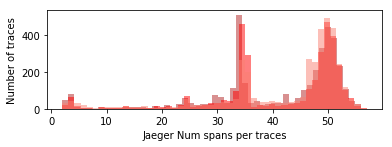

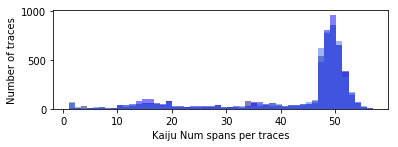

In [48]:
pyplot.subplot(2, 1, 1)
for i in range(n_tests):
    a = 0.5
    l = "Jaeger " + str(i)
    pyplot.hist(lj_numSpansPerTrace[i], 50, color=j_color[i], alpha=a, label=l)
pyplot.xlabel('Jaeger Num spans per traces')
pyplot.ylabel('Number of traces')
pyplot.show()

pyplot.subplot(2, 1, 2)
for i in range(n_tests):
    a = 0.5
    l = "Kaiju " + str(i)
    pyplot.hist(lnumSpansPerTrace[i], 50, color=color[i], alpha=a, label=l)
pyplot.xlabel('Kaiju Num spans per traces')
pyplot.ylabel('Number of traces')
pyplot.show()

### API evaluation ###

In [58]:
timings = []
for i in range(n_tests):
    timings.append(np.genfromtxt(path +'kaijuAPI_' + str(i + 1) + '.csv', delimiter=', ', dtype='str'))

t_start = []
t_end = []
n_spans = []
t_diff = []
t_diff_sorted = []

for i in range(n_tests):
    t_start.append(np.array(timings[i][0:,0]).astype(np.int64))
    t_end.append(np.array(timings[i][0:,1]).astype(np.int64))
    n_spans.append(np.array(timings[i][0:,2]).astype(np.int64))
    t_diff.append(np.subtract(t_end[-1], t_start[-1]))
    t_diff_sorted.append(np.sort(t_diff[-1]))

j_timings = []
for i in range(n_tests):
    j_timings.append(np.genfromtxt(path +'jaegerAPI_' + str(i + 1) + '.csv', delimiter=', ', dtype='str'))

j_t_start = []
j_t_end = []
j_n_spans = []
j_t_diff = []
j_t_diff_sorted = []

for i in range(n_tests):
    j_t_start.append(np.array(j_timings[i][0:,0]).astype(np.int64))
    j_t_end.append(np.array(j_timings[i][0:,1]).astype(np.int64))
    j_n_spans.append(np.array(j_timings[i][0:,2]).astype(np.int64))
    j_t_diff.append(np.subtract(j_t_end[-1], j_t_start[-1]))
    j_t_diff_sorted.append(np.sort(j_t_diff[-1]))

In [59]:
tot_num_calls = 0
tot_num_spans = 0
tot_avg_latency = 0
tot_max_latency = 0

j_tot_num_calls = 0
j_tot_num_spans = 0
j_tot_avg_latency = 0
j_tot_max_latency = 0

for i in range(n_tests):
    
    print("TEST NUMBER " + str(i + 1))
    
    tot_num_calls += t_start[i].shape[0]
    tot_num_spans += np.amax(n_spans[i])
    tot_avg_latency += np.mean(t_diff[i])
    tot_max_latency += np.amax(t_diff[i])

    print("Kaiju")
    print("Num calls: " + str(t_start[i].shape[0]))
    print("Num spans: " + str(np.amax(n_spans[i])))
    print("Average latency: "+ str(np.mean(t_diff[i])))
    print("Max latency: "+ str(np.amax(t_diff[i])))
    
    j_tot_num_calls += j_t_start[i].shape[0]
    j_tot_num_spans += np.amax(j_n_spans[i])
    j_tot_avg_latency += np.mean(j_t_diff[i])
    j_tot_max_latency += np.amax(j_t_diff[i])

    print("Jaeger")
    print("Num calls: " + str(j_t_start[i].shape[0]))
    print("Num spans: " + str(np.amax(j_n_spans[i])))
    print("Average latency: "+ str(np.mean(j_t_diff[i])))
    print("Max latency: "+ str(np.amax(j_t_diff[i])))

    print("*******************************************************************\n")
    
print("AVERAGE STATS")
print("Kaiju")
print("Num calls: " + '{:10.2f}'.format(tot_num_calls/n_tests))
print("Num spans: " + '{:10.2f}'.format(tot_num_spans/n_tests))
print("Average latency: "+ '{:10.2f}'.format(tot_avg_latency/n_tests))
print("Max latency: "+ '{:10.2f}'.format(tot_max_latency/n_tests))

TEST NUMBER 1
Kaiju
Num calls: 240
Num spans: 252495
Average latency: 626745.420833
Max latency: 5101060
Jaeger
Num calls: 473
Num spans: 352824
Average latency: 668334.458774
Max latency: 1168980
*******************************************************************

TEST NUMBER 2
Kaiju
Num calls: 230
Num spans: 262733
Average latency: 647945.204348
Max latency: 2235046
Jaeger
Num calls: 467
Num spans: 357106
Average latency: 672288.070664
Max latency: 1227887
*******************************************************************

TEST NUMBER 3
Kaiju
Num calls: 264
Num spans: 271104
Average latency: 569142.537879
Max latency: 1865831
Jaeger
Num calls: 468
Num spans: 351850
Average latency: 675900.929487
Max latency: 1265319
*******************************************************************

AVERAGE STATS
Kaiju
Num calls:     244.67
Num spans:  262110.67
Average latency:  614611.05
Max latency: 3067312.33


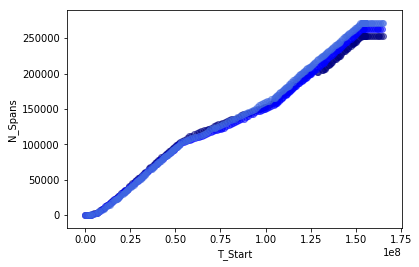

In [60]:
lsortedByTStart_TStart = []
lsortedByTStart_nSpans = []

for i in range(n_tests):
    t_start_inds = t_start[i].argsort()
    sortedByTStart_TStart = t_start[i][t_start_inds]
    lsortedByTStart_nSpans.append(n_spans[i][t_start_inds])
    lsortedByTStart_TStart.append(np.subtract(sortedByTStart_TStart, np.amin(sortedByTStart_TStart)))
    pyplot.scatter(lsortedByTStart_TStart[-1], lsortedByTStart_nSpans[-1], color=color[i], alpha = 0.5)
    
pyplot.ylabel('N_Spans')
pyplot.xlabel('T_Start')
pyplot.show()

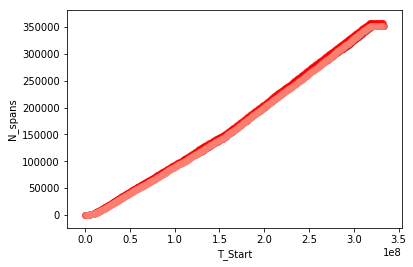

In [61]:
lj_sortedByTStart_TStart = []
lj_sortedByTStart_nSpans = []

for i in range(n_tests):
    j_t_start_inds = j_t_start[i].argsort()
    j_sortedByTStart_TStart = j_t_start[i][j_t_start_inds]
    lj_sortedByTStart_nSpans.append(j_n_spans[i][j_t_start_inds])
    lj_sortedByTStart_TStart.append(np.subtract(j_sortedByTStart_TStart, np.amin(j_sortedByTStart_TStart)))
    pyplot.scatter(lj_sortedByTStart_TStart[-1], lj_sortedByTStart_nSpans[-1], color=j_color[i], alpha = 0.5)
    
pyplot.ylabel('N_spans')
pyplot.xlabel('T_Start')
pyplot.show()

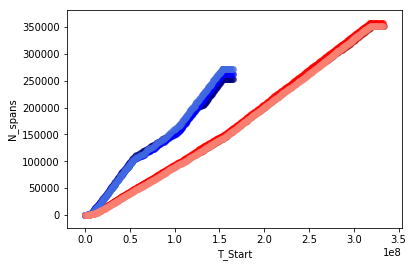

In [62]:
for i in range(n_tests):
    pyplot.scatter(lsortedByTStart_TStart[i], lsortedByTStart_nSpans[i], color=color[i], alpha=0.5)
    pyplot.scatter(lj_sortedByTStart_TStart[i], lj_sortedByTStart_nSpans[i], color=j_color[i], alpha=0.5)
pyplot.ylabel('N_spans')
pyplot.xlabel('T_Start')
pyplot.show()

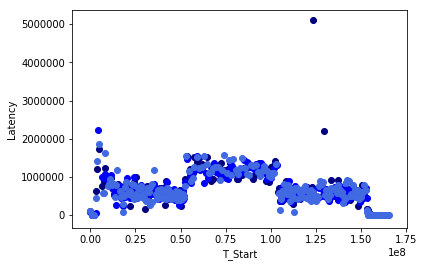

In [63]:
lsortedByTStart_TDiff = []
for i in range(n_tests):
    t_start_inds = t_start[i].argsort()
    lsortedByTStart_TDiff.append(t_diff[i][t_start_inds])
    pyplot.scatter(lsortedByTStart_TStart[i], lsortedByTStart_TDiff[-1], color=color[i])
pyplot.ylabel('Latency')
pyplot.xlabel('T_Start')
pyplot.show()

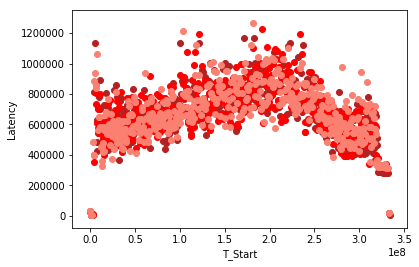

In [64]:
lj_sortedByTStart_TDiff = []
for i in range(n_tests):
    j_t_start_inds = j_t_start[i].argsort()
    lj_sortedByTStart_TDiff.append(j_t_diff[i][j_t_start_inds])
    pyplot.scatter(lj_sortedByTStart_TStart[i], lj_sortedByTStart_TDiff[-1], color=j_color[i])
pyplot.ylabel('Latency')
pyplot.xlabel('T_Start')
pyplot.show()

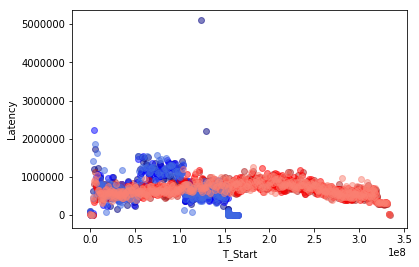

In [65]:
for i in range(n_tests):
    pyplot.scatter(lsortedByTStart_TStart[i], lsortedByTStart_TDiff[i], color=color[i], alpha=0.5)
    pyplot.scatter(lj_sortedByTStart_TStart[i], lj_sortedByTStart_TDiff[i], color=j_color[i], alpha=0.5)
pyplot.ylabel('Latency')
pyplot.xlabel('T_Start')
pyplot.show()

In [ ]:
### Thrift deserialization ###

In [75]:
timings = []
for i in range(n_tests):
    timings.append(np.genfromtxt(path +'thriftTiming_' + str(i + 1) + '.csv', delimiter=',', dtype='str'))

batches = []
t_before = []
t_after = []
n_spans = []
t_diff = []
t_diff_sorted = []

for timing in timings:
    batches.append(np.array(timing[0:,0]))
    t_before.append(np.array(timing[0:,1]).astype(np.int64))
    t_after.append(np.array(timing[0:,2]).astype(np.int64))
    n_spans.append(np.array(timing[0:,3]).astype(np.int64))
    t_diff.append(np.subtract(t_after[-1], t_before[-1]))
    t_diff_sorted.append(np.sort(t_diff[-1]))

In [80]:
tot_num_batches = 0
tot_num_spans = 0

for i in range(n_tests):    
    print("TEST NUMBER " + str(i + 1))
    print("Num batches: " + str(len(batches[i].tolist())))
    print("Num spans: " + str(np.sum(n_spans[i])))
    
    tot_num_batches += len(batches[i].tolist())
    tot_num_spans += np.sum(n_spans[i])
    print("*******************************************************************\n")
    
print("AVERAGE STATS")
print("Num batches: " + str(tot_num_batches/n_tests))
print("Num spans: " + str(tot_num_spans/n_tests))

TEST NUMBER 1
Num batches: 4824
Num spans: 469344
*******************************************************************

TEST NUMBER 2
Num batches: 4824
Num spans: 470615
*******************************************************************

TEST NUMBER 3
Num batches: 4826
Num spans: 470891
*******************************************************************

AVERAGE STATS
Num batches: 4824.666666666667
Num spans: 470283.333333


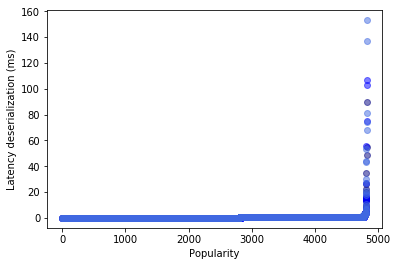

In [87]:
for i in range(n_tests):
    pyplot.plot(t_diff_sorted[i], "bo", color=color[i], alpha=0.5)
pyplot.xlabel('Popularity')
pyplot.ylabel('Latency deserialization (ms)')
pyplot.show()

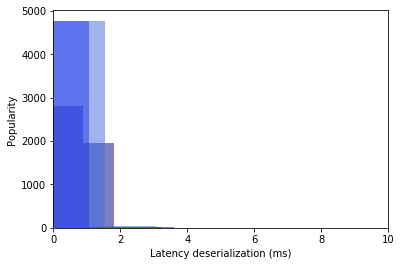

In [92]:
for i in range(n_tests):
    pyplot.hist(t_diff_sorted[i], 100, color=color[i], alpha=0.5)
pyplot.xlim(0,10)
pyplot.ylabel('Popularity')
pyplot.xlabel('Latency deserialization (ms)')
pyplot.show()

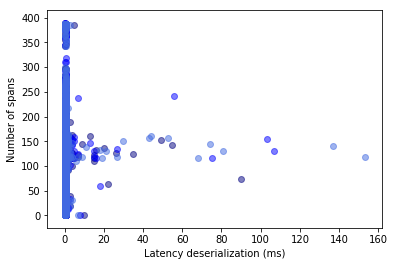

In [90]:
for i in range(n_tests):
    pyplot.scatter(t_diff[i], n_spans[i], color=color[i], alpha=0.5)
pyplot.ylabel('Number of spans')
pyplot.xlabel('Latency deserialization (ms)')
pyplot.show()

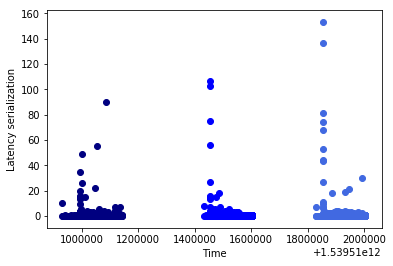

In [94]:
for i in range(n_tests):
    pyplot.scatter(t_before[i], t_diff[i], color=color[i])
pyplot.xlabel('Time')
pyplot.ylabel('Latency serialization')
pyplot.show()

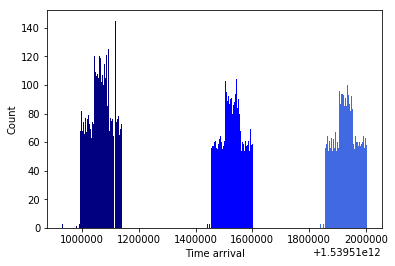

In [96]:
for i in range(n_tests):
    pyplot.hist(t_before[i], 80, color=color[i])
pyplot.xlabel('Time arrival')
pyplot.ylabel('Count')
pyplot.show()